In [20]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt

iris_df = pd.read_csv('https://raw.githubusercontent.com/mark-andrews/pdms02/master/data/iris.csv')

In [7]:
species_rename = {'Iris-setosa': 0,
                  'Iris-versicolor': 1,
                  'Iris-virginica': 2}

iris_df = iris_df.assign(target = list(map(species_rename.get, iris_df.species)))

inputs, targets = iris_df.iloc[:,0:4].values, iris_df.target.values

train_X, test_X, train_y, test_y = train_test_split(inputs,
                                                    targets,
                                                    test_size = 0.2)

In [6]:
decision_tree = DecisionTreeClassifier(random_state = 10101)

In [13]:
cross_val_score(decision_tree, inputs, targets, cv = 5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

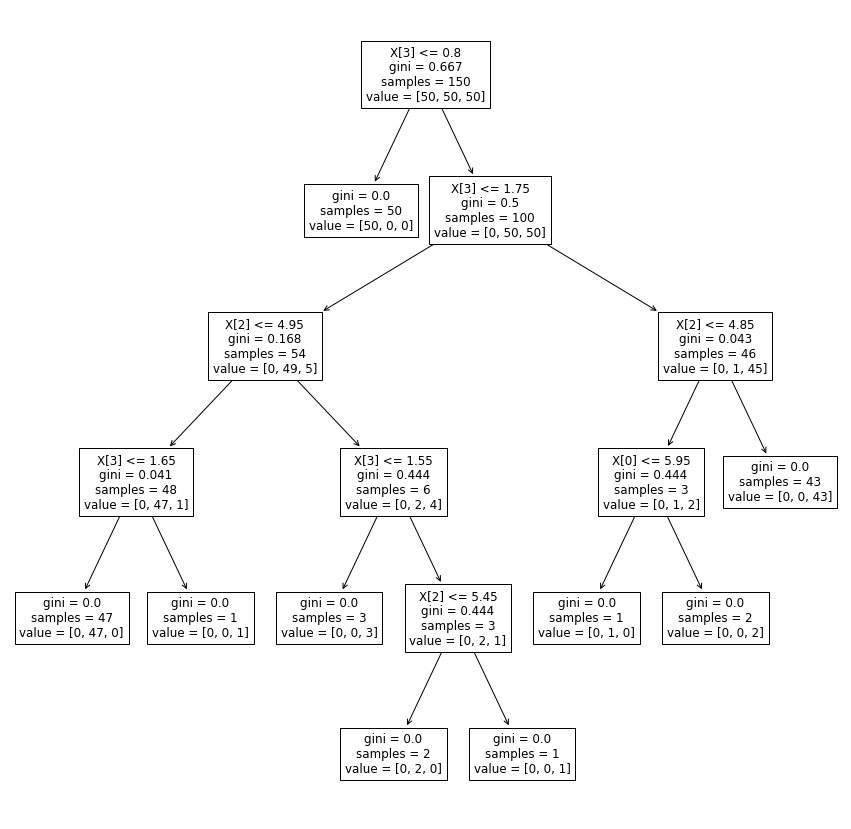

In [42]:
decision_tree = DecisionTreeClassifier(random_state=11)
result = decision_tree.fit(inputs, targets)

fig = plt.subplots(figsize=(15,15))
tree.plot_tree(result);

In [43]:
forest = RandomForestClassifier(n_estimators=50)

In [44]:
%%timeit 

cross_val_score(forest, inputs, targets, cv = 10)

1.24 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
?RandomForestClassifier